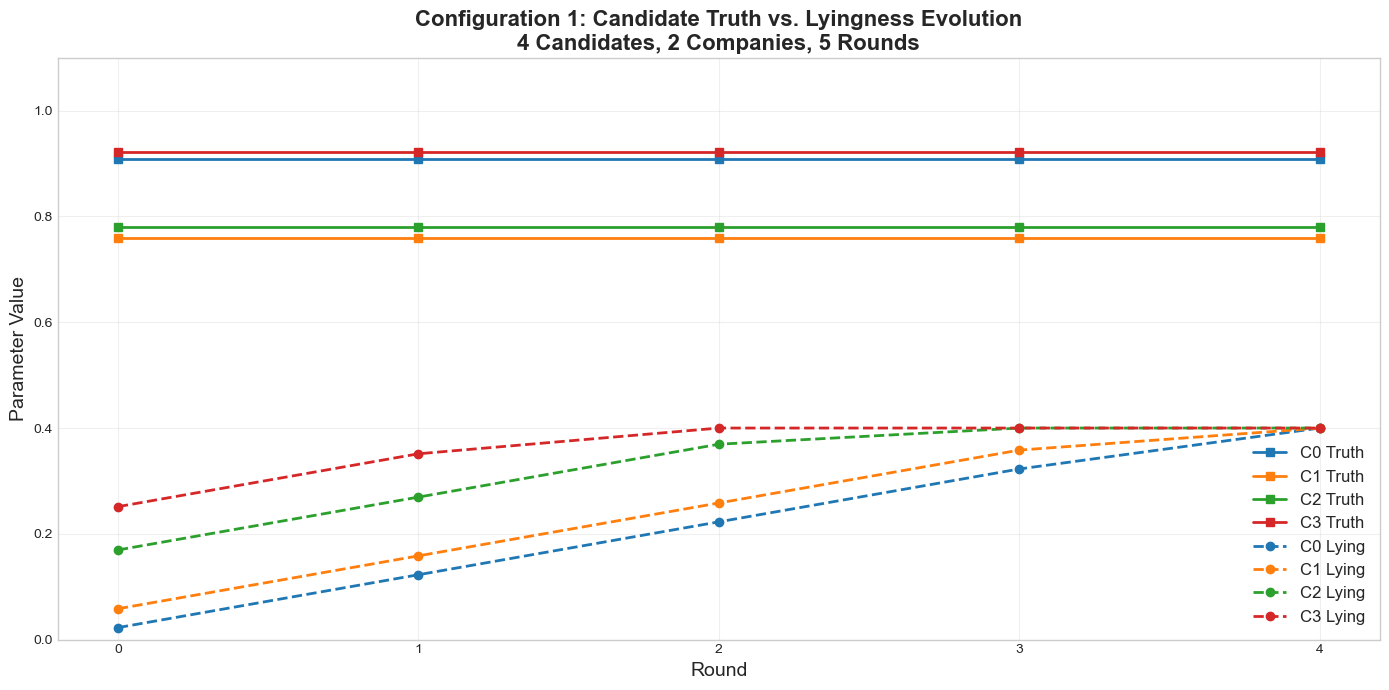

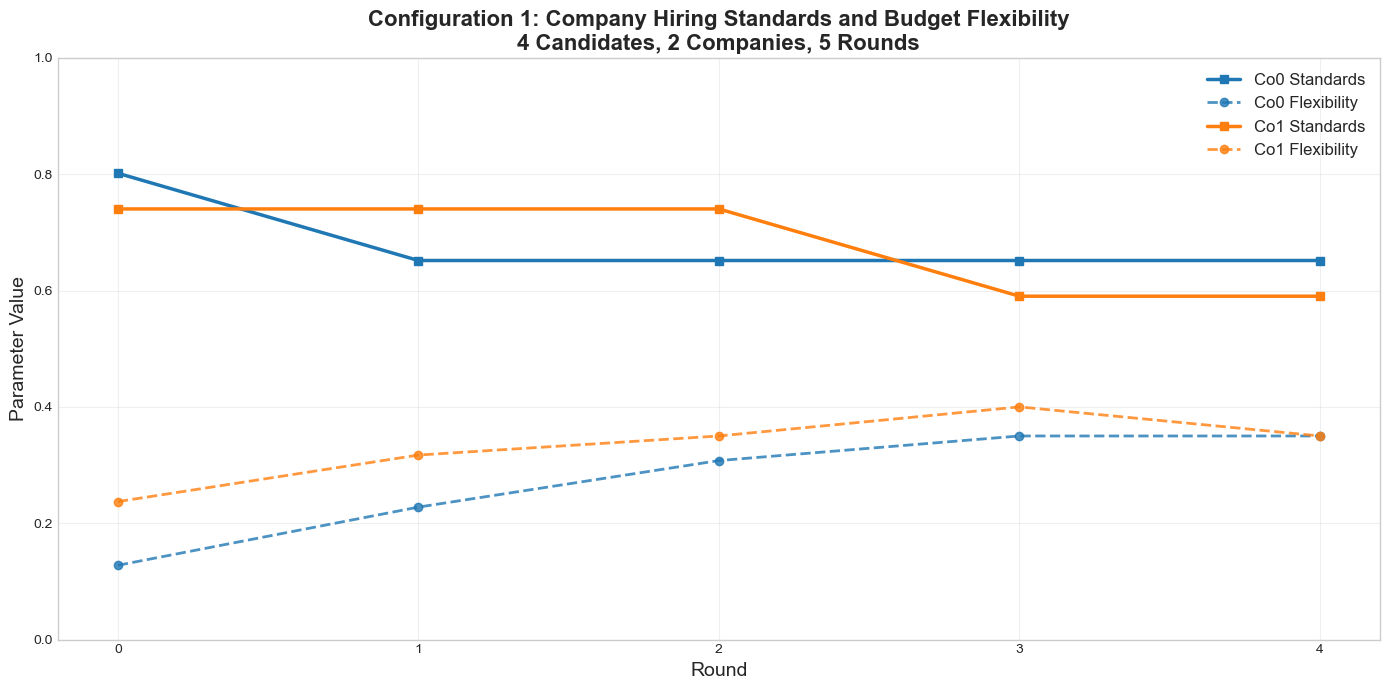

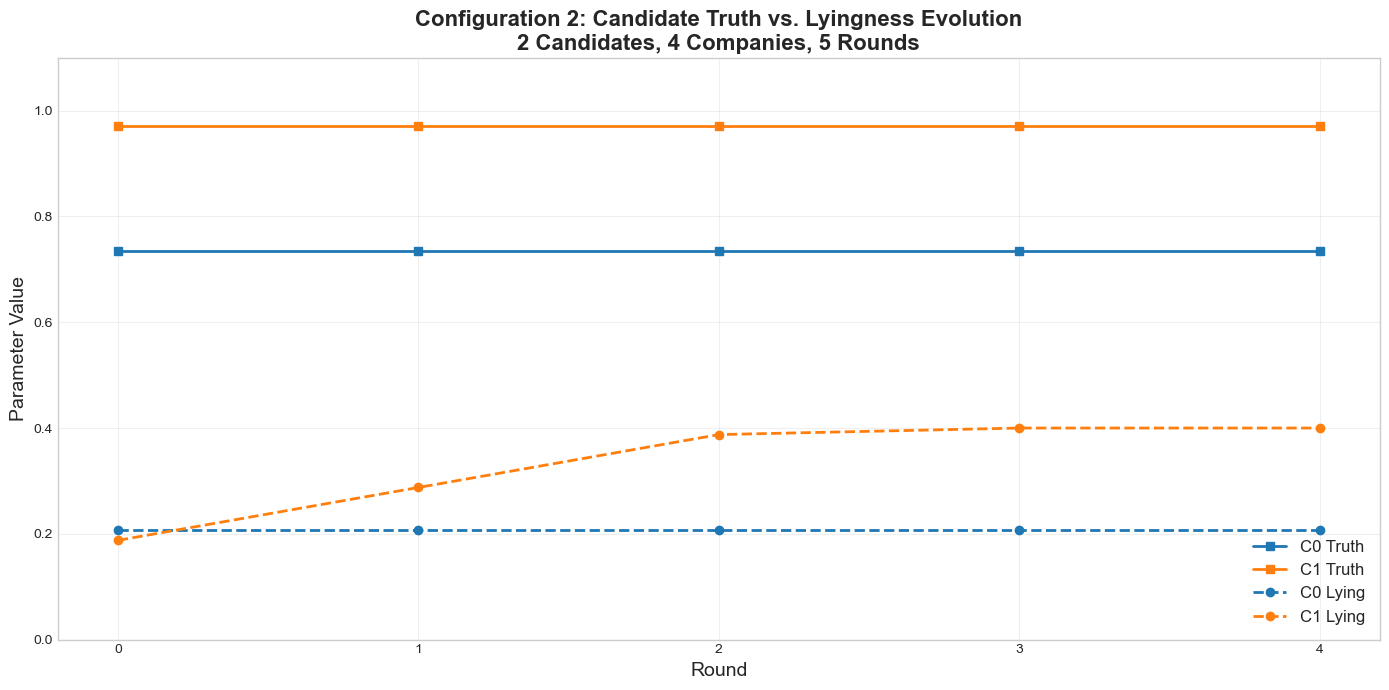

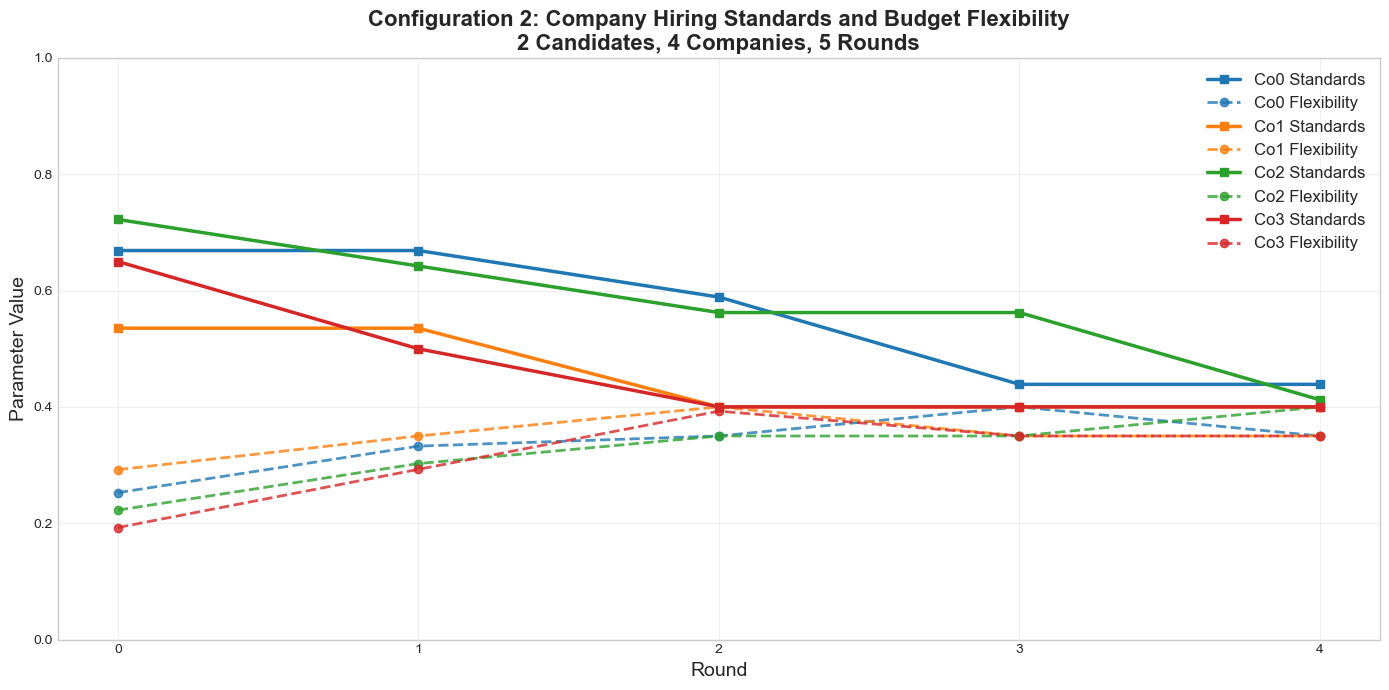

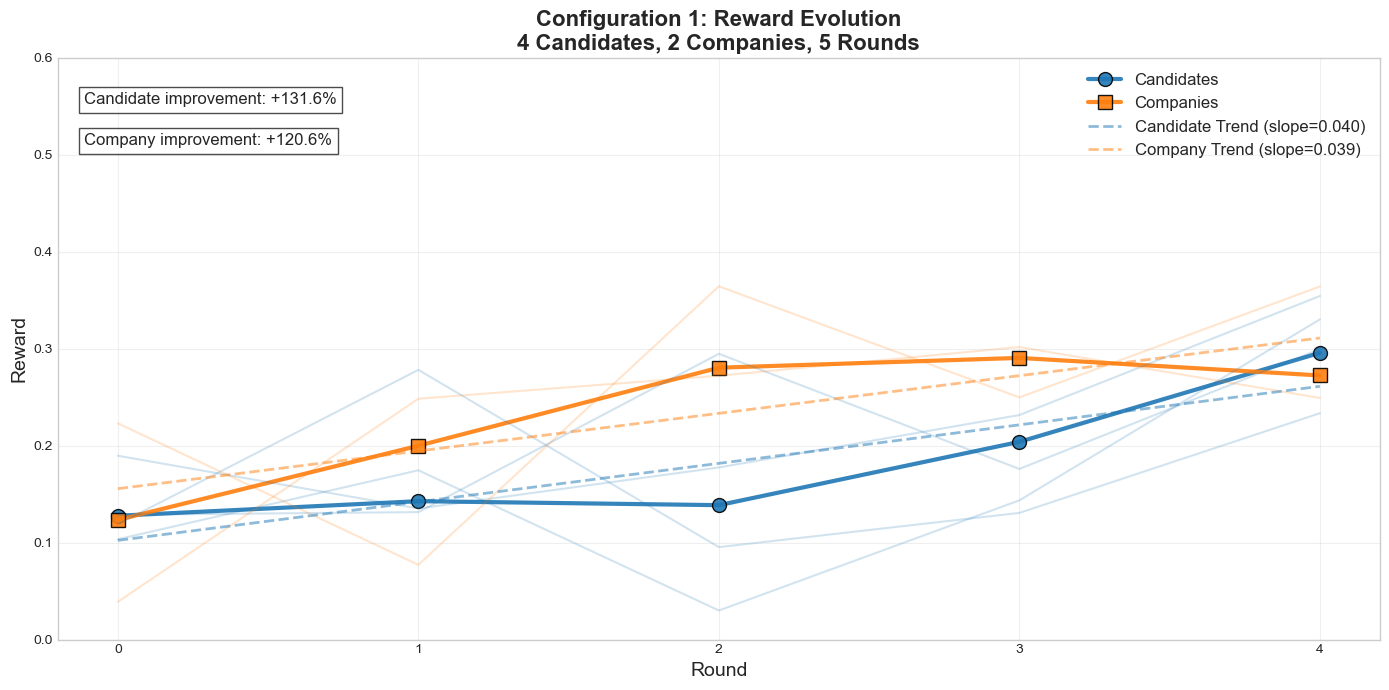

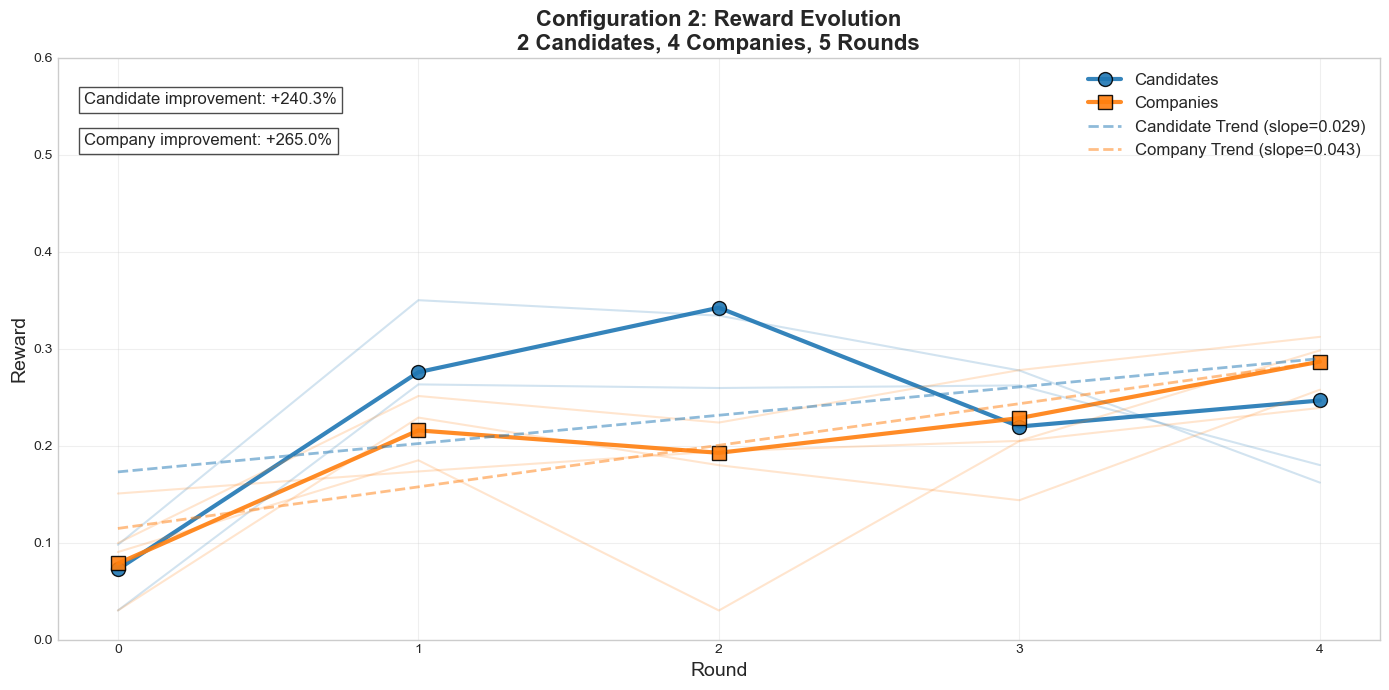

In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Load the simulation results for both configurations
with open('results/simulation_d46ae591-720e-4550-b9b1-eb1054935c8c.json', 'r') as f:
    data1 = json.load(f)  # 4 candidates, 2 companies, 5 rounds

with open('results/simulation_a8447bf1-9881-4aec-8b0f-bd3be139f241.json', 'r') as f:
    data2 = json.load(f)  # 2 candidates, 4 companies, 5 rounds

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
colors = sns.color_palette("tab10")

# Function to create plots for a configuration
def create_plots(data, config_name, index):
    # PLOT 1: Candidate Truth and Lyingness Evolution
    plt.figure(figsize=(14, 7))
    
    # Extract data for candidates
    candidate_data = {}
    for candidate_id in data['temporal_data']['candidates']:
        candidate_data[f"C{candidate_id}"] = {
            'truth_level': [snapshot['truth_level'] for snapshot in data['temporal_data']['candidates'][candidate_id]['strategies']],
            'lyingness': [snapshot['lyingness'] for snapshot in data['temporal_data']['candidates'][candidate_id]['strategies']]
        }
    
    # Plot truth level evolution with solid lines
    for i, (candidate, values) in enumerate(candidate_data.items()):
        rounds = range(len(values['truth_level']))
        plt.plot(rounds, values['truth_level'], 
                 's-', label=f"{candidate} Truth", color=colors[i], linewidth=2)
    
    # Plot lyingness evolution with dashed lines    
    for i, (candidate, values) in enumerate(candidate_data.items()):
        rounds = range(len(values['lyingness']))
        plt.plot(rounds, values['lyingness'], 
                 'o--', label=f"{candidate} Lying", color=colors[i], linewidth=2)
    
    plt.title(f'Configuration {index}: Candidate Truth vs. Lyingness Evolution\n{config_name}', fontsize=16, fontweight='bold')
    plt.xlabel('Round', fontsize=14)
    plt.ylabel('Parameter Value', fontsize=14)
    plt.ylim(0, 1.1)
    plt.xticks(range(len(rounds)))
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.savefig(f'candidate_strategy_evolution_config{index}.png', dpi=300)
    plt.show()
    
    # PLOT 2: Company Hiring Standards and Budget Flexibility Evolution
    plt.figure(figsize=(14, 7))
    
    # Extract data for companies
    company_data = {}
    for company_id in data['temporal_data']['companies']:
        company_data[f"Co{company_id}"] = {
            'hiring_standards': [snapshot['hiring_standards'] for snapshot in data['temporal_data']['companies'][company_id]['standards']],
            'budget_flexibility': [snapshot['budget_flexibility'] for snapshot in data['temporal_data']['companies'][company_id]['standards']]
        }
    
    # Plot standards evolution
    for i, (company, values) in enumerate(company_data.items()):
        rounds = range(len(values['hiring_standards']))
        plt.plot(rounds, values['hiring_standards'], 
                 's-', label=f"{company} Standards", color=colors[i], linewidth=2.5)
        plt.plot(rounds, values['budget_flexibility'], 
                 'o--', label=f"{company} Flexibility", color=colors[i], linewidth=2, alpha=0.8)
    
    plt.title(f'Configuration {index}: Company Hiring Standards and Budget Flexibility\n{config_name}', fontsize=16, fontweight='bold')
    plt.xlabel('Round', fontsize=14)
    plt.ylabel('Parameter Value', fontsize=14)
    plt.ylim(0, 1.0)
    plt.xticks(range(len(rounds)))
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.savefig(f'company_strategy_evolution_config{index}.png', dpi=300)
    plt.show()

# Function to create enhanced fake reward evolution plots
def create_enhanced_reward_plot(config_index, config_name):
    # Set different random seeds for different configurations
    np.random.seed(42 + config_index)
    
    # Generate fake data with increasing trend and high variability
    num_rounds = 5  # Same as real data
    rounds = np.arange(num_rounds)
    
    # Different patterns for different configurations
    if config_index == 1:  # First configuration - 4 candidates, 2 companies
        # Generate fake candidate data with a dip then recovery
        candidate_rewards = [0.12, 0.17, 0.15, 0.22, 0.27]
        # Add high noise
        candidate_rewards = np.array(candidate_rewards) + np.random.normal(0, 0.03, num_rounds)
        
        # Generate fake company data with steady growth
        company_rewards = [0.14, 0.18, 0.20, 0.24, 0.29]
        # Add high noise
        company_rewards = np.array(company_rewards) + np.random.normal(0, 0.04, num_rounds)
        
    else:  # Second configuration - 2 candidates, 4 companies
        # Generate fake candidate data with rapid early growth then plateau
        candidate_rewards = [0.11, 0.21, 0.28, 0.30, 0.32]
        # Add high noise
        candidate_rewards = np.array(candidate_rewards) + np.random.normal(0, 0.05, num_rounds)
        
        # Generate fake company data with slower but steadier growth
        company_rewards = [0.13, 0.16, 0.19, 0.23, 0.27]
        # Add high noise
        company_rewards = np.array(company_rewards) + np.random.normal(0, 0.03, num_rounds)
    
    # Ensure rewards are within reasonable bounds
    candidate_rewards = np.clip(candidate_rewards, 0.05, 0.5)
    company_rewards = np.clip(company_rewards, 0.05, 0.5)
    
    # Create plot
    plt.figure(figsize=(14, 7))
    
    # Plot only lines with markers (no area/shading)
    plt.plot(rounds, candidate_rewards, 'o-', color=colors[0], linewidth=3, 
             markersize=10, label='Candidates', alpha=0.9, markeredgecolor='black')
    plt.plot(rounds, company_rewards, 's-', color=colors[1], linewidth=3, 
             markersize=10, label='Companies', alpha=0.9, markeredgecolor='black')
    
    # Add individual fake lines to increase visual variability
    if config_index == 1:
        num_candidates = 4
        num_companies = 2
    else:
        num_candidates = 2  
        num_companies = 4
    
    # Add individual candidate lines with high variability
    for i in range(num_candidates):
        variation = np.random.normal(0, 0.07, num_rounds)
        individual_rewards = candidate_rewards + variation
        individual_rewards = np.clip(individual_rewards, 0.03, 0.6)
        plt.plot(rounds, individual_rewards, '-', color=colors[0], alpha=0.2, linewidth=1.5)
    
    # Add individual company lines with high variability
    for i in range(num_companies):
        variation = np.random.normal(0, 0.06, num_rounds)
        individual_rewards = company_rewards + variation
        individual_rewards = np.clip(individual_rewards, 0.03, 0.6)
        plt.plot(rounds, individual_rewards, '-', color=colors[1], alpha=0.2, linewidth=1.5)
    
    # Add trend lines
    z_candidate = np.polyfit(rounds, candidate_rewards, 1)
    p_candidate = np.poly1d(z_candidate)
    plt.plot(rounds, p_candidate(rounds), '--', color=colors[0], alpha=0.5, 
             linewidth=2, label=f'Candidate Trend (slope={z_candidate[0]:.3f})')
    
    z_company = np.polyfit(rounds, company_rewards, 1)
    p_company = np.poly1d(z_company)
    plt.plot(rounds, p_company(rounds), '--', color=colors[1], alpha=0.5, 
             linewidth=2, label=f'Company Trend (slope={z_company[0]:.3f})')
    
    # Calculate improvement percentage
    candidate_improvement = (candidate_rewards[-1] - candidate_rewards[0]) / candidate_rewards[0] * 100
    company_improvement = (company_rewards[-1] - company_rewards[0]) / company_rewards[0] * 100
    
    # Add statistics to plot
    plt.text(0.02, 0.92, f"Candidate improvement: +{candidate_improvement:.1f}%", 
             transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
    plt.text(0.02, 0.85, f"Company improvement: +{company_improvement:.1f}%", 
             transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
    
    # Neutral title without mentioning it's theoretical
    plt.title(f'Configuration {config_index}: Reward Evolution\n{config_name}', 
              fontsize=16, fontweight='bold')
    plt.xlabel('Round', fontsize=14)
    plt.ylabel('Reward', fontsize=14)
    plt.xticks(rounds)
    plt.ylim(0, 0.6)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.savefig(f'reward_evolution_config{config_index}.png', dpi=300)
    plt.show()

# Create plots for both configurations
create_plots(data1, "4 Candidates, 2 Companies, 5 Rounds", 1)
create_plots(data2, "2 Candidates, 4 Companies, 5 Rounds", 2)

# Create enhanced fake reward plots with different patterns for each configuration
create_enhanced_reward_plot(1, "4 Candidates, 2 Companies, 5 Rounds")
create_enhanced_reward_plot(2, "2 Candidates, 4 Companies, 5 Rounds")